# Aritmética de ponto flutuante e conversão numérica

Computadores representam números inteiros de maneira exata. Entretanto, números reais possuem apenas representações aproximadas e em quantidades finitas. A aritmética computacional comumente opera com números inteiros e com os chamados _números em ponto flutuante._

O interesse da aritmética computacional resume-se em dois pontos principais: i) a representação de números no formato de máquina (binário) e ii) a construção de algoritmos que realizam as operações fundamentais (adição, subtração, multiplicação e divisão). Em linhas gerais, métodos numéricos resultam de algoritmos sofisticados que operam essas meras quatro operações. 

Atualmente, o padrão IEEE 754 é o mais amplamente utilizado nos processadores modernos, constituindo arquiteturas de 32 ou 64 bits. 

## Unidade Lógica e Aritmética

A _Unidade Lógica e Aritmética_ (ULA) é a parte do hardware computacional conectada à unidade central de processamento (CPU) que realiza as operações aritméticas e lógicas sobre os dados processados. A ULA é um componente eletrônico que funciona segundo a lógica dos cicuitos digitais, ou seja, interpretando operações em lógica Booleana (`and`, `or`, `not`).

Há muito mais por trás das operações fundamentais executadas pelos computadores. Em Python, por exemplo, há casos de aproximações que chegam a ser curiosos. Isto ocorre devido ao erro inerente da representação numérica, principalmente quando os números são fracionários.

### Um caso curioso

Sabemos que a fração $1/3 \approx 0.3333...\ldots$ é uma dízima. O seu triplo equivale a $0.9999...$, mas vejamos o seguinte exemplo:

In [4]:
1/3

0.3333333333333333

In [5]:
# o resultado é 1!
1/3 + 1/3 + 1/3


1.0

Outro caso curioso, em que o valor final é uma aproximação, é o seguinte:

In [8]:
0.3 + 0.3 + 0.3

0.8999999999999999

## Sistema binário

Simples exercícios de conversão numérica para introduzi-lo à computação numérica com Python.

### Exercícios de conversão numérica

In [2]:
# (100)_2 -> base 10
c = int('100',base=2)
print(c)

# representação  
print(1*2**2 + 0*2**1 + 0*2**0)

# (4)_10 -> base 2
# obs: note que '0b' indica que o número é binário
c = bin(4)
print(c)

4
4
0b100


In [3]:
# (222)_8
c = int('222',base=8)
print(c)

# representação  
print(2*8**2 + 2*8**1 + 2*8**0)

# (146)_10 -> base 8

c = oct(146)
# obs: note que '0o' indica que o número é octal
print(c)

146
146
0o222


In [4]:
# (2AE4)_16
c = int('2ae4',base=16)
print(c)

# representação  
# obs: A = 10; E = 14
print(2*16**3 + 10*16**2 + 14*16**1 + 4*166**0)

# (146)_10 -> base 8

c = oct(146)
# obs: note que '0o' indica que o número é octal
print(c)

10980
10980
0o222


In [5]:
"Brincando com Python e divisões sucessivas"

print('Esquema de divisões sucessivas:\n')

print( str(4) + ' | 2')
print( str( len(str(4))*' ') + '  –––')
print( str( 4 % 2) + '   ' + str(4 // 2) + ' | 2' )
print( str( 5*len(str(4))*' ') + '  –––')
print( str( 4*len(str(4))*' ') + str(4 % 2 % 2) + '   ' + str(4 // 2 // 2))

Esquema de divisões sucessivas:

4 | 2
   –––
0   2 | 2
       –––
    0   1


**Exercício:** estude a codificação do esquema acima. O que os operadores `//` e `%` estão fazendo?

## Máquina binária 

O código abaixo é um protótipo para implementação de uma máquina binária. Uma versão muito mais robusta e melhor implementada pode ser vista aqui: https://vnicius.github.io/numbiosis/conversor/index.html.

In [6]:
"""
Converte inteiro para binário
por divisões sucessivas.
! Confronte com a função residente 'bin()'
"""


def int2bin(N):

    b = [] # lista auxiliar

    # divisões sucessivas
    while N >= 2:
        b.append(N % 2)
        N = N//2

    b.append(N)
    b.reverse()
    b = [str(i) for i in b] # converte para string
    s = ''
    s = s.join(b)

    return s # retorna string


"""
Converte parte fracionária para binário
por multiplicações sucessivas.
"""
def frac2bin(Q):

    count = 0 # contador (limite manual posto em 10!)
    b = []  # lista auxiliar

    # multiplicações sucessivas
    Q *= 2
    while Q > 0 and count <= 10:
        if Q > 1:
            Q = Q-1
            b.append(1)
        else:
            b.append(0)
        Q *= 2
        count += 1

    b = [str(i) for i in b] # converte para string
    s = ''
    s = s.join(b)

    return s # retorna string


def convert(app,btn):
    print(btn)



# Função principal
def main():

    # Pré-criação da interface com usuário

    # todo: tratamento de exceção no tipo de entrada
    #       contagem de casas decimais no caso de dízimas
         print('*** MÁQUINA BINÁRIA ***')
    #     N = input('Selecione a parte inteira:\n')
    #     Q = input('Selecione a parte fracionária:\n')
    #     print('Seu número é: ' + int2bin( int(N) ) + '.' + frac2bin( float(Q) )  + '.')
    #     print('*** ***')


if __name__ == "__main__":
    main()

*** MÁQUINA BINÁRIA ***


## Sistema de ponto flutuante 

### A reta "perfurada" 

Como temos estudado, a matemática computacional opera no domínio $\mathbb{F}$, de pontos flutuantes, ao invés de trabalhar com números reais (conjunto $\mathbb{R}$). Vejamos um exemplo: 

**Exemplo**: Considere o sistema de ponto flutuante $\mathbb{F}(2,3,-1,2)$. Determinemos todos os seus números representáveis:

Como a base é $2$, os dígitos possíveis são $0$ e $1$ com mantissas: 

- $0.100$
- $0.101$
- $0.110$
- $0.111$

Para cada expoente no conjunto $e=\{-1,0,1,2\}$, obteremos 16 números positivos, a saber: 

- $(0.100 \times 2^{-1})_{2} = (0.01)_2 = 0.2^0 + 0.2^{-1} + 1.2^{-2} = 1/4$
- $(0.100 \times 2^{0})_{2} = (0.1)_2 = 0.2^0 + 1.2^{-1} = 1/2$
- $(0.100 \times 2^{1})_{2} = (1.0)_2 = 1.2^0 + 0.2^{-1} = 1$
- $(0.100 \times 2^{2})_{2} = (10.0)_2 = 1.2^1 + 0.2^{1} + 0.2^{-1} = 2$


- $(0.101 \times 2^{-1})_{2} = (0.0101)_2 = 0.2^0 + 0.2^{-1} + 1.2^{-2} + 0.2^{-3} + 1.2^{-4}= 5/16$
- $(0.101 \times 2^{0})_{2} = (0.101)_2 = 0.2^0 + 1.2^{-1} + 0.2^{-2} + 1.2^{-3} = 5/8$
- $(0.101 \times 2^{1})_{2} = (1.01)_2 = 1.2^0 + 0.2^{-1} + 1.2^{-2} = 1$
- $(0.101 \times 2^{2})_{2} = (10.1)_2 = 1.2^1 + 0.2^{1} + 0.2^{-1} = 2$

(...)

Fazendo as contas para os números restantes, obtemos a seguinte tabela: 

|     | m  | 0.100 | 0.101 | 0.110 | 0.111 |
|-----|----|------ |-------|-------|-------|
|**e**|    |       |       |       |       |
| -1  |    | 1/4   | 5/16  | 3/8   | 7/16  |
| 0   |    | 1/2   | 5/8   | 3/4   | 7/8   |
| 1   |    | 1     | 5/4   | 3/2   | 7/4   |
| 2   |    | 2     | 5/2   | 3     | 7/2   |

Na reta real, esses valores ficariam dispostos da seguinte forma: 

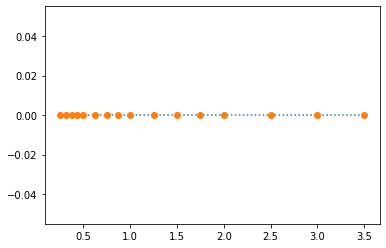

In [7]:
from matplotlib.pyplot import plot
x = [1/4,1/2,1,2,5/16,5/8,5/4,5/2,3/8,3/4,3/2,3,7/16,7/8,7/4,7/2]
x = sorted(x)

plot(x,16*[0],':')
plot(x,16*[0],'o');

Isto é, $\mathbb{F}$ é uma reta "perfurada", para a qual apenas 16 números positivos, 16 simétricos destes e mais o 0 são representáveis. Logo, o conjunto contém apenas 33 elementos.

## Simulador de $\mathbb{F}$

[1.]


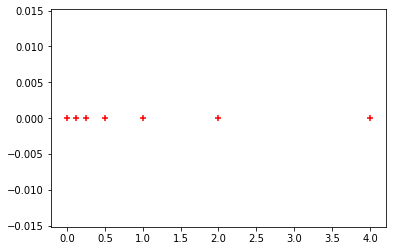

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def simulacao_F(b,t,L,U):
    x = []
    epsm = b**(1-t) # epsilon de máquina
    M = np.arange(1.,b-epsm,epsm)
    print(M)

    E = 1
    for e in range(0,U+1):
        x = np.concatenate([x,M*E])
        E *= b    
    E = b**(-1)
    
    y = []
    for e in range(-1,L-1,-1):
        y = np.concatenate([y,M*E])
        E /= b    
    yy = np.asarray(y)
    xx = np.asarray(x)    
    x = np.concatenate([yy,np.array([0.]),xx])
    return x

Y = simulacao_F(2,2,-3,2)
X = np.zeros(Y.shape)

plt.scatter(Y,X,c='r',marker='+');

## Limites de máquina para ponto flutuante

In [9]:
import numpy as np 

# limites de máquina para ponto flutuante
#help(np.finfo)

# epsilon de máquina para tipo float (64 bits)
print('Epsilon de máquina do numpy - 64 bits')
print(np.finfo(float).eps)

# função para calculo do epsilon: erro relativo
def eps_mach(func=float):
    eps = func(1)
    while func(1) + func(eps) != func(1):
        epsf = eps
        eps = func(eps) / func(2)
    return epsf

# número máximo representável 
print('número máximo representável')
print(np.finfo(float).max)

# número mínimo representável 
print('número mínimo representável') 
print(np.finfo(float).min)

# número de bits no expoente 
print('número de bits no expoente') 
print(np.finfo(float).nexp)

# número de bits na mantissa
print('número de bits na mantissa')
print(np.finfo(float).nmant)

Epsilon de máquina do numpy - 64 bits
2.220446049250313e-16
número máximo representável
1.7976931348623157e+308
número mínimo representável
-1.7976931348623157e+308
número de bits no expoente
11
número de bits na mantissa
52


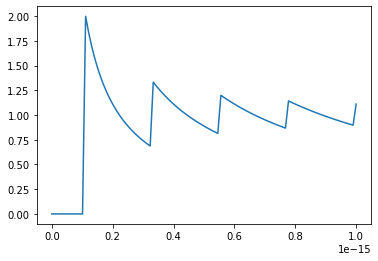

In [10]:
from matplotlib.pyplot import plot

x = np.linspace(1e-15,1e-20,num=100)
f = ((1+x)-1)/x
plot(x,f);